In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


# University of Strathclyde - MSc Artificial Intelligence and Applications

# CS982 - Big Data Technologies

File Created first created 11th October 2019 by Barry Smart.

## Stage 6 - Analysis Of Indivisual Variables
The purpose of this notebook is to do analysis of the core data items that are of interest:
- Life expectancy;
- Economic prosperity;
- Population growth.


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


In [2]:
region_ranking = ["North America", "Europe & Central Asia", "Middle East & North Africa",\
    "Latin America & Caribbean", "East Asia & Pacific", "South Asia", "Sub-Saharan Africa"]
region_palette = {"North America" : "red", "Europe & Central Asia" : "blue",\
    "Middle East & North Africa" : "pink", "Latin America & Caribbean" : "purple",\
        "East Asia & Pacific" : "green", "South Asia" : "orange", "Sub-Saharan Africa" : "gray"}



## Stage 6.1 - Read The File
 Read in the file that was generated from the previous script.

In [3]:
#github_path = "C:/Users/Barry/"
data_path = str(os.getcwd()) + "\\assignment1\\"
interpolated_data_set = pd.read_pickle(data_path + "interpolated_data_set.pkl")


## Stage 6.2 - Prepare Source Data for Analysis
 A few simple steps to prepare the data set for visualisation:
 - Add column : Log10 of GDP - This step was added retrospectively, because inspection of the data shows that we will be required to work with "Log GDP" in order to generate more meaningful analysis.
 - Flatten the data by resetting the index so that the index columns are available for plotting.


In [4]:
interpolated_data_set["Log GDP per Capita"] = np.log10(interpolated_data_set["GDP per capita (current US$)"])
interpolated_data_set_flattened = interpolated_data_set.reset_index()


In [5]:
mean_by_region_and_year = interpolated_data_set.groupby(level=["Region", "Year"]).mean().reset_index()
mean_by_region_and_year.index.name = 'ID'


In [6]:
mean_by_country_and_decade = interpolated_data_set.groupby(level=["Region", "Country", "Decade"]).mean().reset_index()
mean_by_country_and_decade.index.name = 'ID'


In [7]:
mean_by_country_and_decade[["Country", "Life expectancy at birth, total (years)"]].sort_values(by=["Country"])


Series Name,Country,"Life expectancy at birth, total (years)"
ID,,
965,Afghanistan,62.836222
963,Afghanistan,53.009700
962,Afghanistan,46.417600
961,Afghanistan,39.905300
960,Afghanistan,34.690800
...,...,...
1255,Zimbabwe,57.921000
1256,Zimbabwe,60.560700
1257,Zimbabwe,51.486600


## Stage 6.3 - Create "Slice" Of Data For 2018
 In this section I will analyse data for 2018 in more depth with the purpose of generating some simple initial insights into the data.


In [8]:
# Use the xs function to grab a cross section of the data, using the power of the multi-level-index.
analysis_of_2018 = interpolated_data_set.xs(2018, level="Year", drop_level=False)
# Flatten the dataframe to open up all columns for access by the matplotlib and seaborn libraries.
analysis_of_2018_flattened = analysis_of_2018.reset_index()
analysis_of_2018_flattened.index.name = 'ID'
analysis_of_2018_flattened.shape


(217, 26)

## Stage 6.4 - Analysis of Life Expectancy
Using a number of techniques to get a feel for the life expectany data:
 - Looking at top 10 and bottom 10 countries in 2018;
 - Distribution of data by region in 2018;
 - Analysing how it has developed over time since 1960.


### Life Expectancy 2018 - Top 10 Countries

In [9]:
analysis_of_2018_flattened.loc[:,["Country", "Region", "Life expectancy at birth, total (years)"]]\
    .nlargest(10, "Life expectancy at birth, total (years)")

Series Name,Country,Region,"Life expectancy at birth, total (years)"
ID,,,
67,San Marino,Europe & Central Asia,85.417073
4,"Hong Kong SAR, China",East Asia & Pacific,84.680488
5,Japan,East Asia & Pacific,84.099756
7,"Macao SAR, China",East Asia & Pacific,83.989000
72,Switzerland,Europe & Central Asia,83.602439
70,Spain,Europe & Central Asia,83.329268
57,Italy,Europe & Central Asia,83.243902
12,Singapore,East Asia & Pacific,82.895122
40,Channel Islands,Europe & Central Asia,82.766000


### Life Expectancy 2018 - Bottom 10 Countries

In [10]:
analysis_of_2018_flattened.loc[:,["Country", "Region", "Life expectancy at birth, total (years)"]]\
    .nsmallest(10, "Life expectancy at birth, total (years)")

Series Name,Country,Region,"Life expectancy at birth, total (years)"
ID,,,
173,Central African Republic,Sub-Saharan Africa,52.240
203,Lesotho,Sub-Saharan Africa,52.947
174,Chad,Sub-Saharan Africa,53.712
187,Sierra Leone,Sub-Saharan Africa,53.895
205,Nigeria,Sub-Saharan Africa,53.950
188,Somalia,Sub-Saharan Africa,56.709
199,Côte d'Ivoire,Sub-Saharan Africa,57.017
189,South Sudan,Sub-Saharan Africa,57.365
179,Guinea-Bissau,Sub-Saharan Africa,57.673


### Summary - Life Expectancy "League Tables" 2018
Some shocking revelations:
 - The gap between the bottom and top is over 30 years!;
 - The bottom 10 countries are **ALL** in Sub-Saharan Africa.

### Life Expectancy Over Time - Analysing Distribution of Data
 First look at histograms for the data across a range of years in the data set

C:\Users\barry\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\barry\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


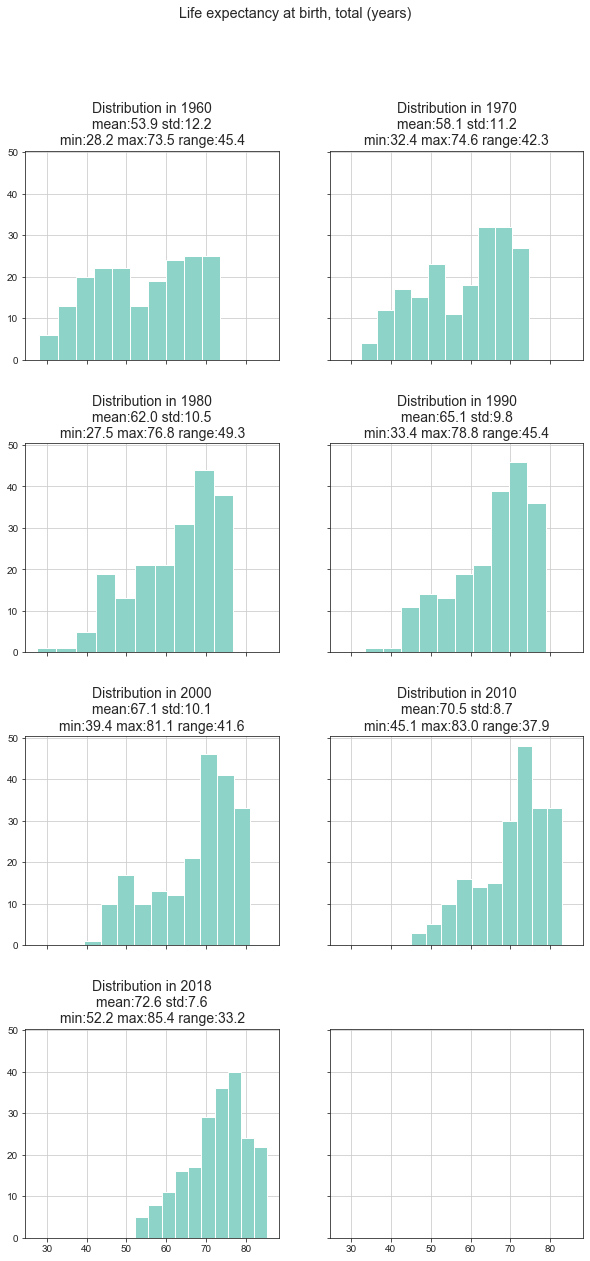

In [11]:
# This funtion places each sub plot onto the frame
def create_sub_plot(figure, axes, x_position, y_position, data_series, year):
    axes[x_position,y_position].hist(data_series)
    max_value = pd.DataFrame.max(data_series)
    min_value = pd.DataFrame.min(data_series)
    range = max_value - min_value
    title = "Distribution in {}\nmean:{:2.1f} std:{:2.1f}\nmin:{:2.1f} max:{:2.1f} range:{:2.1f}"\
        .format(year, pd.DataFrame.mean(data_series), pd.DataFrame.std(data_series), min_value, max_value, range)
    axes[x_position,y_position].set_title(title, fontdict = {"fontsize" : 14})

# This function configures the frame and then iterates through the results to create slices of the data that can be plotted
def plot_year_histograms(dataframe, x_column, share_x=True, share_y=True):
    # Set up the number of sub plots based on the dimensions of experiments and points
    figure_size_unit = 5 # This governs the size of each subplot on the figure 
    list_of_years = [1960, 1970, 1980, 1990, 2000, 2010, 2018]
    list_of_plot_positions = {1960 : (0,0), 1970 : (0,1), 1980 : (1,0), 1990 : (1,1), 2000 : (2,0), 2010 : (2,1), 2018 : (3,0)}
    plot_columns = 2
    plot_rows = 4
    sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '-'})
    figure, axes = plt.subplots(plot_rows, plot_columns, sharex=share_x, sharey=share_y,\
        figsize=(figure_size_unit * plot_columns, figure_size_unit * plot_rows))
    plt.rcParams.update({'axes.titlesize' : 14, 'lines.linewidth' : 1.5,\
        'axes.labelsize' : 14, 'xtick.labelsize' : 12, 'ytick.labelsize' : 12})
    for year_index, year in enumerate(list_of_years):
            # Use the "cross section" method to grab the results for a specific experiment and points configuration
            data_series = dataframe.xs(year, level="Year", drop_level=False)[x_column]
            # Send the data off to get plotted
            create_sub_plot(figure, axes, list_of_plot_positions[year][0], list_of_plot_positions[year][1] , data_series, year)
    plt.subplots_adjust(hspace=.4)
    figure.suptitle(x_column, fontsize="x-large")

plot_year_histograms(interpolated_data_set, "Life expectancy at birth, total (years)")


### Boxplot For 2018
Now using box plots to look at distribution by country.

In [12]:
# Create a helper function for box plots of different columns by region.
def region_box_plot(data_frame, x_column, plot_title, x_scale="linear"):
    sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '-'})
    plt.rcParams.update({'axes.titlesize' : 18, 'lines.linewidth' : 1.5,\
        'axes.labelsize' : 16, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16})
    f, ax = plt.subplots(figsize=(10, 6))
    ax.set(xscale=x_scale)
    #plt.title(plot_title)
    box_plot = sns.boxplot(x=x_column, y="Region", order=region_ranking, data=analysis_of_2018_flattened, palette=region_palette, ax=ax)
    box_plot.axes.set_title(plot_title,fontsize=18)
    box_plot.set_xlabel(x_column,fontsize=14)
    box_plot.set_ylabel("Region",fontsize=14)
    box_plot.tick_params(labelsize=12)


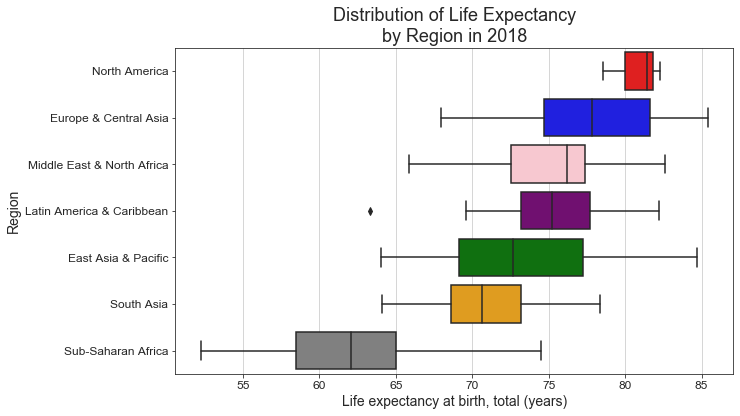

In [13]:
region_box_plot(analysis_of_2018_flattened, "Life expectancy at birth, total (years)", "Distribution of Life Expectancy\nby Region in 2018")


### Notes
 There is a significant outlier for "Latin America & Caribbean" - it would be good to investigate this further.
 TODO - add a backlog item.

 The country is Haiti:
 (https://borgenproject.org/top-10-facts-about-life-expectancy-in-haiti/)[https://borgenproject.org/top-10-facts-about-life-expectancy-in-haiti/]


In [14]:
analysis_of_2018_flattened.loc[:,["Country", "Region", "Life expectancy at birth, total (years)"]]\
    .loc[analysis_of_2018_flattened["Region"] == "Latin America & Caribbean"]\
    .nsmallest(10, "Life expectancy at birth, total (years)")


Series Name,Country,Region,"Life expectancy at birth, total (years)"
ID,,,
112,Haiti,Latin America & Caribbean,63.290000
128,Guyana,Latin America & Caribbean,69.624000
113,Bolivia,Latin America & Caribbean,70.945000
105,St. Kitts and Nevis,Latin America & Caribbean,71.336585
135,Suriname,Latin America & Caribbean,71.463000
136,Venezuela,Latin America & Caribbean,72.246000
134,St. Vincent and the Grenadines,Latin America & Caribbean,72.300000
126,Grenada,Latin America & Caribbean,72.388000
114,El Salvador,Latin America & Caribbean,72.872000


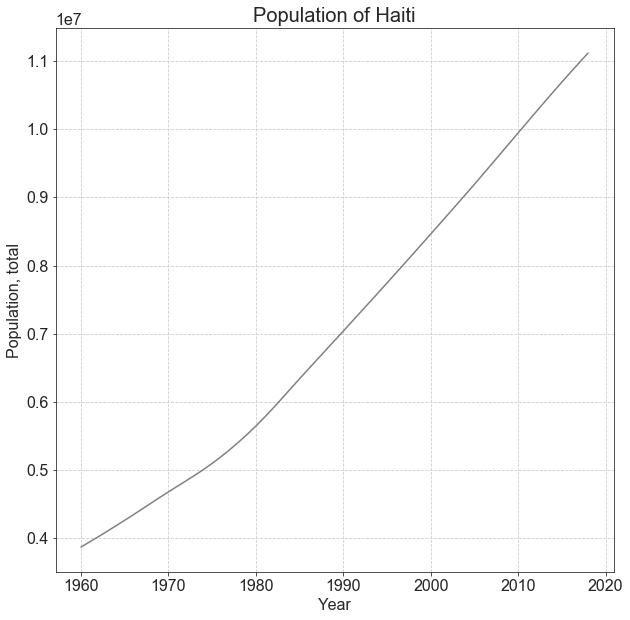

In [15]:
haiti_data = interpolated_data_set_flattened.loc[interpolated_data_set_flattened["Country"] == "Haiti"]
sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '--'})
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Population of Haiti", fontdict = {"fontsize" : 20})
sns.lineplot(x="Year", y="Population, total",\
    color="gray", data=haiti_data, ax=ax)



In [16]:
#### Development of Life Expectancy Over Time
#Lets now examine how the gap in life expectancy across different nations has developed over time.
#
#To do this we  need to:
# - Go back to our original interpolated_data data set so that we have access to the full data set rather than just 2018;
# - Roll up the data by calculating the mean of *ALL* series by Year for each Region.
# - Generage a line plot to show how each series develops over time.
#


In [17]:
def region_line_plot(data_frame, y_column, plot_title, y_scale="linear"):
    sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '-', })
    plt.rcParams.update({'axes.titlesize' : 18, 'lines.linewidth' : 3,\
        'axes.labelsize' : 16, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16})
    f, ax = plt.subplots(figsize=(10, 10))
    ax.set(yscale=y_scale)
    plt.title(plot_title, fontdict = {"fontsize" : 20})
    sns.lineplot(x="Year", y=y_column,\
        hue="Region",\
        hue_order=region_ranking,\
        linewidth=3,\
        palette=region_palette,\
        data=data_frame, ax=ax)


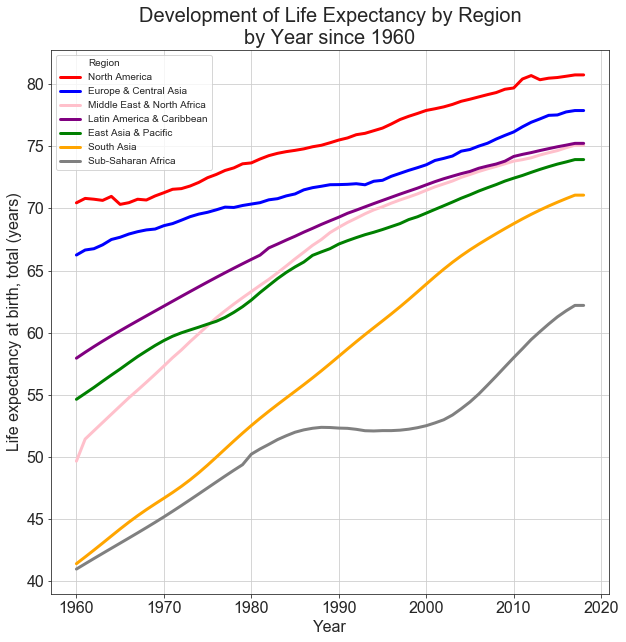

In [18]:
region_line_plot(mean_by_region_and_year, "Life expectancy at birth, total (years)", "Development of Life Expectancy by Region\nby Year since 1960", y_scale="linear")



C:\Users\barry\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\barry\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


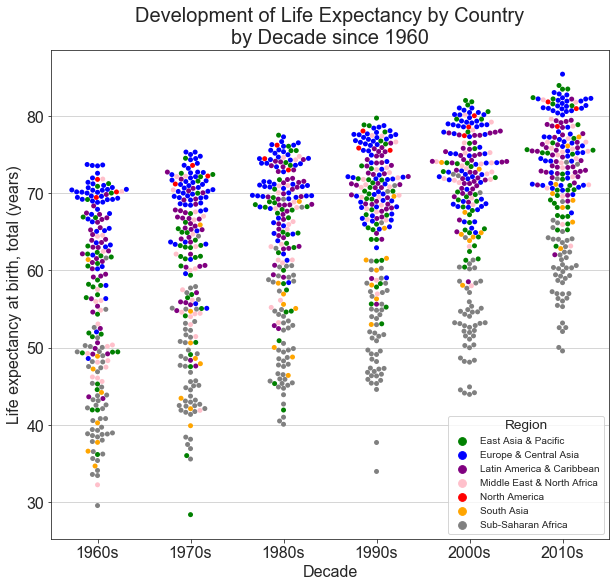

In [19]:
f, ax = plt.subplots(figsize=(10, 9))
sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '-'})
plt.rcParams.update({'axes.titlesize' : 18, 'lines.linewidth' : 3,\
    'axes.labelsize' : 16, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16})
plt.title("Development of Life Expectancy by Country\nby Decade since 1960", fontdict = {"fontsize" : 20})
sns.swarmplot(x="Decade", y="Life expectancy at birth, total (years)", hue="Region",\
    palette=region_palette, data=mean_by_country_and_decade)


### Conclusions - Development of Life Expectancy Over Time
The following observations can be made from the data above:
 - The gap in life expectancy has closed (more than halved) between 6 of te 7 regions;
 - Meanwhile life expectancy for the Sub-Saharan Africa region has not improved at the same rate, mainly as a result of a plateau in the 1990s;
 - The net result is that the gap between those countries with the worst and best record for life expectancy has not closed appreciably since 1960.


## Stage 6.5 - Analysing Gross Domestic Product (GDP)
Using a number of techniques to get a feel for the life expectany data:
 - Looking at top 10 and bottom 10 countries in 2018;
 - Distribution of data by region in 2018;
 - Analysing how it has developed over time since 1960.


### GDP 2018 - Bottom 10 Countries

In [20]:
analysis_of_2018_flattened.loc[:,["Country", "Region", "GDP per capita (current US$)"]]\
    .nlargest(10, "GDP per capita (current US$)")


Series Name,Country,Region,GDP per capita (current US$)
ID,,,
62,Monaco,Europe & Central Asia,166726.051926
59,Liechtenstein,Europe & Central Asia,165028.245029
61,Luxembourg,Europe & Central Asia,114340.498742
7,"Macao SAR, China",East Asia & Pacific,86355.407652
158,Bermuda,North America,85748.065414
72,Switzerland,Europe & Central Asia,82838.929445
64,Norway,Europe & Central Asia,81807.198039
56,Isle of Man,Europe & Central Asia,79155.541672
55,Ireland,Europe & Central Asia,78806.431996


### GDP 2018 - Bottom 10 Countries

In [21]:
analysis_of_2018_flattened.loc[:,["Country", "Region", "GDP per capita (current US$)"]]\
    .nsmallest(10, "GDP per capita (current US$)")


Series Name,Country,Region,GDP per capita (current US$)
ID,,,
172,Burundi,Sub-Saharan Africa,275.429603
189,South Sudan,Sub-Saharan Africa,283.487802
188,Somalia,Sub-Saharan Africa,314.562363
182,Malawi,Sub-Saharan Africa,389.398033
185,Niger,Sub-Saharan Africa,411.688943
181,Madagascar,Sub-Saharan Africa,460.752781
184,Mozambique,Sub-Saharan Africa,490.167582
173,Central African Republic,Sub-Saharan Africa,509.970975
161,Afghanistan,South Asia,520.896603


### Summary - GDP "League Tables" 2018
Some shocking revelations:
 - The gap between the bottom and top is three orders of magnitude!;
 - Building on the pattern seen with life expectancy, 9 of bottom 10 countries are in Sub-Saharan Africa.

### GDP - Distribution of Data
 Look at histograms for the data across a range of years in the data set

C:\Users\barry\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\barry\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


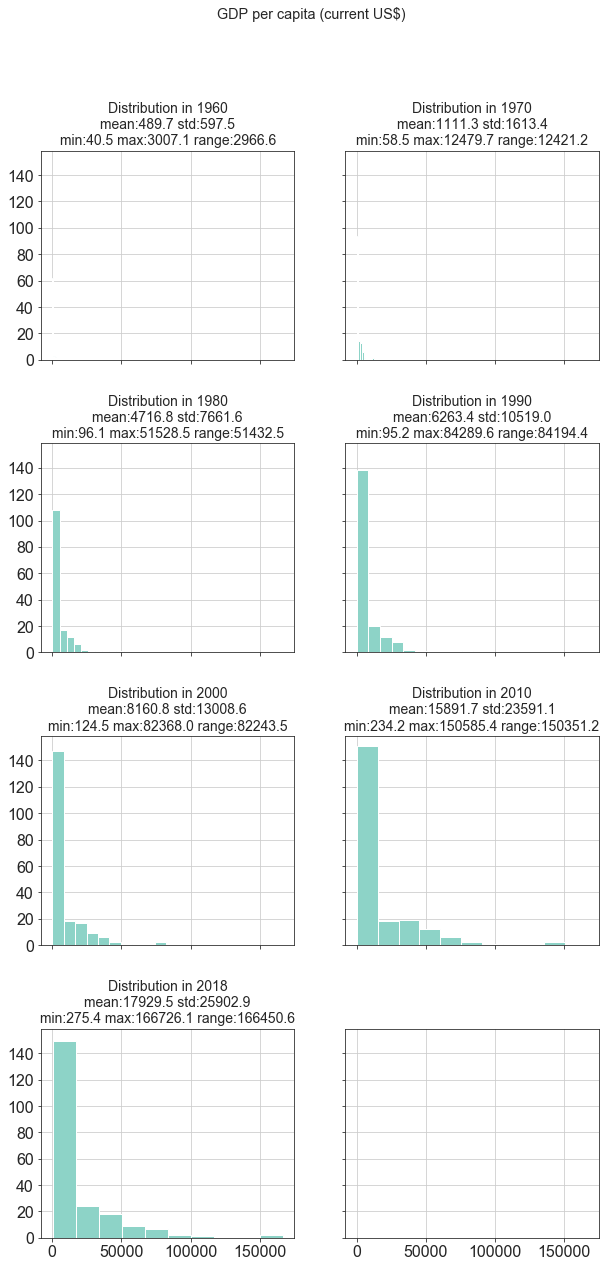

In [22]:
plot_year_histograms(interpolated_data_set, "GDP per capita (current US$)")


### GDP 2018 - Analysing Distribution of Data for All Regions
Now using box plots to look at distribution by country.

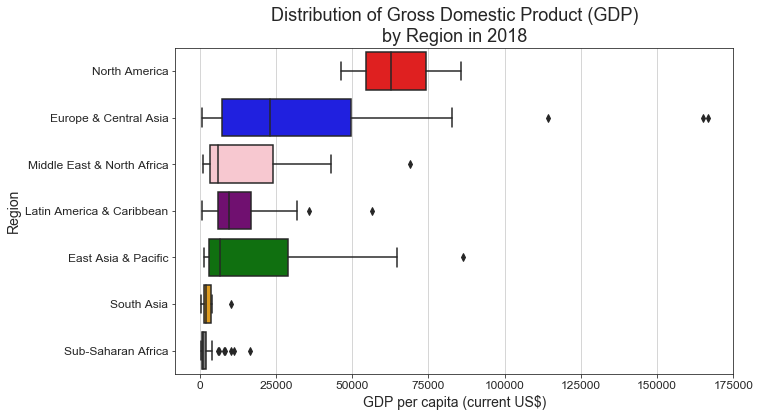

In [23]:
region_box_plot(analysis_of_2018_flattened, "GDP per capita (current US$)", "Distribution of Gross Domestic Product (GDP)\nby Region in 2018")


The data is quite skewed given that it is spread over 4 orders of magnitude.
So lets try the same plot but use a logarithmic scale.


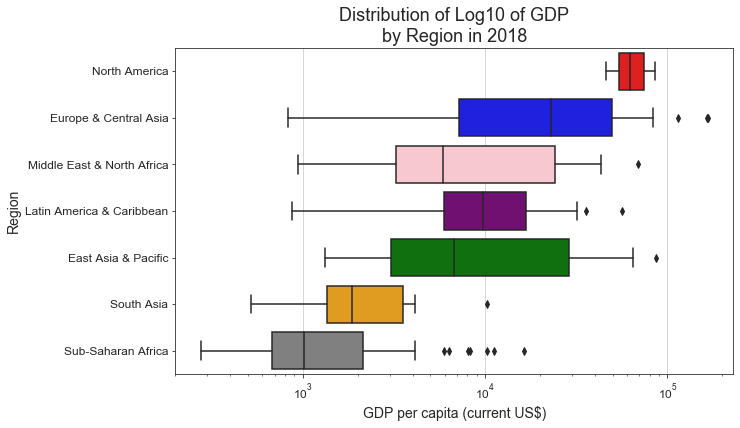

In [24]:
region_box_plot(analysis_of_2018_flattened, "GDP per capita (current US$)", "Distribution of Log10 of GDP\nby Region in 2018", x_scale="log")


 Figure 5 above illustrates the stark reality that the gap between the poorest and richest countries in the world is many orders of magnitude in scale.  There are some significant outliers of note:
 There is a significant range of values across some regions – for example, countries in Europe & Central Asia span from Tajikistan ($827 per capita) to Monaco ($166,726 per capita);
 Whilst Sub-Saharan Africa is overall the poorest region, there are some richer countries that appear as outliers, such as the Seychelles ($16,433 per capita).

 It will be useful to create a new series of data in the dataframe that is the Log10 of GDP.
 We should go back earlier in the process to add a calculated column which is "log to base 10 of GDP"
 TODO - add a backlog item.

### Development of GDP Over Time
Lets now examine how the gap in GDP across different nations has developed over time.


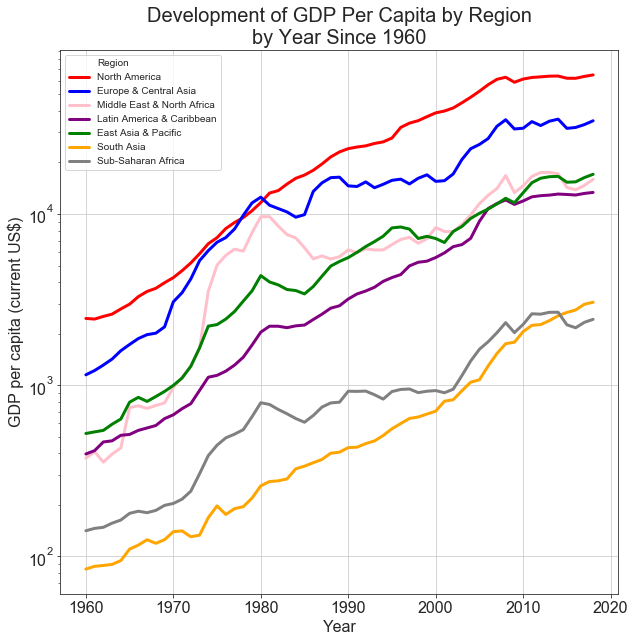

In [25]:
region_line_plot(mean_by_region_and_year, "GDP per capita (current US$)",\
    "Development of GDP Per Capita by Region\nby Year Since 1960", y_scale="log")


C:\Users\barry\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\barry\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


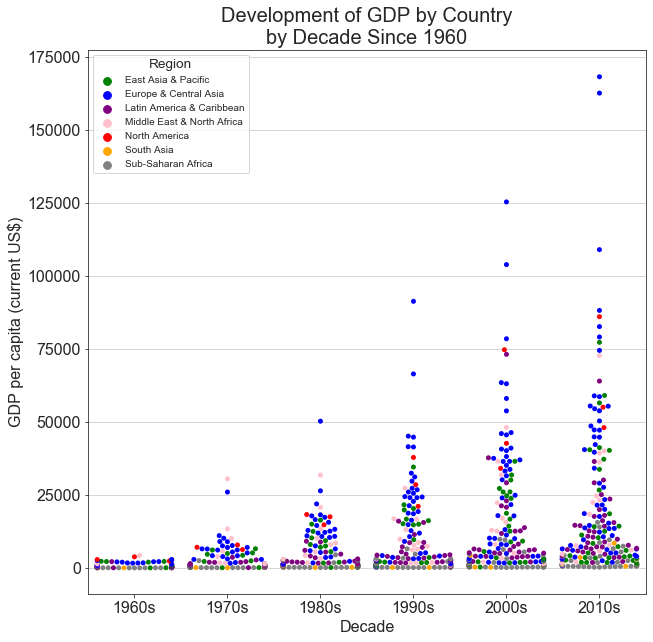

In [26]:
sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '-'})
f, ax = plt.subplots(figsize=(10, 10))
#ax.set(yscale="log")
plt.title("Development of GDP by Country\nby Decade Since 1960", fontdict = {"fontsize" : 20})
sns.swarmplot(x="Decade", y="GDP per capita (current US$)", hue="Region",\
    palette=region_palette, data=mean_by_country_and_decade)


### Conclusions - Development of GDP Over Time
The following observations can be made from the data above:
 - The gap in GDP has opened up significantly (exponentially?) since 1960;
 - The regions that are being left behind are South Asia and Sub-Saharan Africa ;
 - Looking at this from a wider perspective, it is the upper quartile countries that are accelerating away, leaving 75% of countries therefore lagging behind significantly.
 - This starts to open up serious questions about the distribution of wealth globally;
 - It also begins to indicate the likelihood of close correlation between GDP and Life Expectancy?

## Stage 6.6 - Analysing Population Trends
Using a number of techniques to get a feel for the life expectany data:
 - Looking at top 10 and bottom 10 countries in 2018;
 - Distribution of data by region in 2018;
 - Analysing how it has developed over time since 1960.

### Population 2018 - Top 10 Countries

In [27]:
analysis_of_2018_flattened.loc[:,["Country", "Region", "Population, total"]]\
    .nlargest(10, "Population, total")

Series Name,Country,Region,"Population, total"
ID,,,
28,China,East Asia & Pacific,1.392730e+09
165,India,South Asia,1.352617e+09
160,United States,North America,3.271674e+08
15,Indonesia,East Asia & Pacific,2.676634e+08
166,Pakistan,South Asia,2.122150e+08
119,Brazil,Latin America & Caribbean,2.094693e+08
205,Nigeria,Sub-Saharan Africa,1.958747e+08
163,Bangladesh,South Asia,1.613560e+08
91,Russia,Europe & Central Asia,1.444780e+08


### Population 2018 - Bottom 10 Countries

In [28]:
analysis_of_2018_flattened.loc[:,["Country", "Region", "Population, total"]]\
    .nsmallest(10, "Population, total")


Series Name,Country,Region,"Population, total"
ID,,,
36,Tuvalu,East Asia & Pacific,11508.0
32,Nauru,East Asia & Pacific,12704.0
11,Palau,East Asia & Pacific,17907.0
98,British Virgin Islands,Latin America & Caribbean,29802.0
50,Gibraltar,Europe & Central Asia,33718.0
67,San Marino,Europe & Central Asia,33785.0
106,St. Martin (French part),Latin America & Caribbean,37264.0
109,Turks and Caicos Islands,Latin America & Caribbean,37665.0
59,Liechtenstein,Europe & Central Asia,37910.0


### Population Growth 2018 - Top 10 Countries

In [29]:
analysis_of_2018_flattened.loc[:,["Country", "Region", "Population growth (annual %)"]]\
    .nlargest(10, "Population growth (annual %)")


Series Name,Country,Region,Population growth (annual %)
ID,,,
137,Bahrain,Middle East & North Africa,4.921161
185,Niger,Sub-Saharan Africa,3.816869
167,Maldives,South Asia,3.813136
193,Uganda,Sub-Saharan Africa,3.721387
212,Equatorial Guinea,Sub-Saharan Africa,3.654507
141,Oman,Middle East & North Africa,3.445118
194,Angola,Sub-Saharan Africa,3.276134
140,Malta,Middle East & North Africa,3.264720
175,Dem. Rep. Congo,Sub-Saharan Africa,3.226699


### Population Growth 2018 - Bottom 10 Countries

In [30]:
analysis_of_2018_flattened.loc[:,["Country", "Region", "Population growth (annual %)"]]\
    .nsmallest(10, "Population growth (annual %)")


Series Name,Country,Region,Population growth (annual %)
ID,,,
103,Puerto Rico,Latin America & Caribbean,-3.983500
136,Venezuela,Latin America & Caribbean,-1.785865
60,Lithuania,Europe & Central Asia,-1.383804
32,Nauru,East Asia & Pacific,-1.344821
145,Syrian Arab Republic,Middle East & North Africa,-0.952015
41,Croatia,Europe & Central Asia,-0.855406
83,Bosnia and Herzegovina,Europe & Central Asia,-0.826855
58,Latvia,Europe & Central Asia,-0.811938
84,Bulgaria,Europe & Central Asia,-0.733768


### Population Growth - Distribution of Data
 First look at histograms for the data across a range of years in the data set

C:\Users\barry\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\barry\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


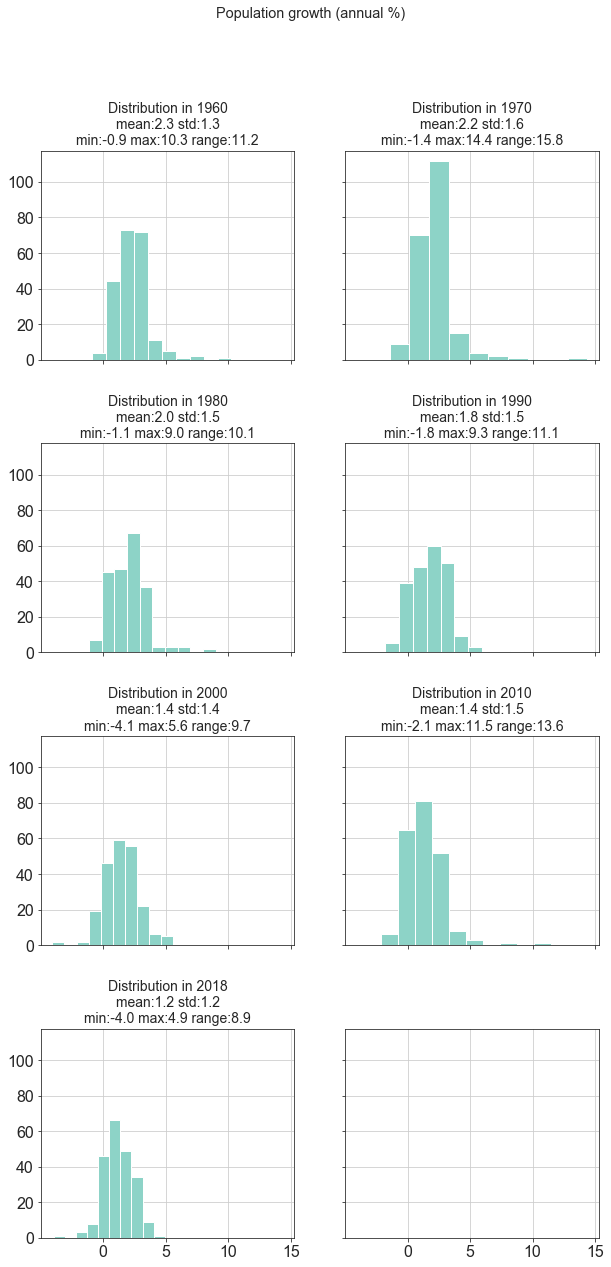

In [31]:
plot_year_histograms(interpolated_data_set, "Population growth (annual %)")


### Population Growth - Distribution In 2018
 Use a boxplot to take a look at population growth distribution by region in 2018

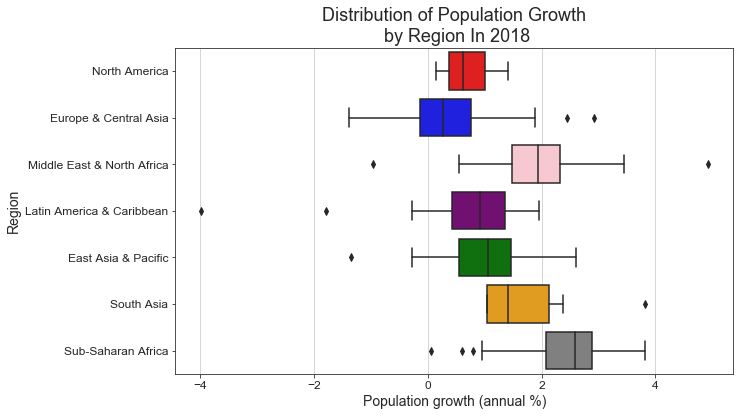

In [32]:
region_box_plot(analysis_of_2018_flattened, "Population growth (annual %)", "Distribution of Population Growth\n by Region In 2018", x_scale="linear")


### Listing of Countries With Negative Population Growth in 2018

In [33]:
analysis_of_2018_flattened.loc[analysis_of_2018_flattened["Population growth (annual %)"] < 0][["Region", "Country", "Population growth (annual %)"]]


Series Name,Region,Country,Population growth (annual %)
ID,,,
5,East Asia & Pacific,Japan,-0.202670
27,East Asia & Pacific,American Samoa,-0.279066
32,East Asia & Pacific,Nauru,-1.344821
41,Europe & Central Asia,Croatia,-0.855406
50,Europe & Central Asia,Gibraltar,-0.029653
51,Europe & Central Asia,Greece,-0.251472
52,Europe & Central Asia,Greenland,-0.260259
53,Europe & Central Asia,Hungary,-0.196157
57,Europe & Central Asia,Italy,-0.174304


### Puerto Rico
 Puerto Rico is the outlier in Latin America & Caribbean with a population growth of -3.9%.
 The country is facing outmigration due to “the effects of a decade-long economic recession, Puerto Ricans – who are U.S. citizens at birth – have increasingly moved to the U.S. mainland”
 (https://www.pewresearch.org/fact-tank/2016/03/24/historic-population-losses-continue-across-puerto-rico/)[https://www.pewresearch.org/fact-tank/2016/03/24/historic-population-losses-continue-across-puerto-rico/]

 The following chart illustrates this reality:


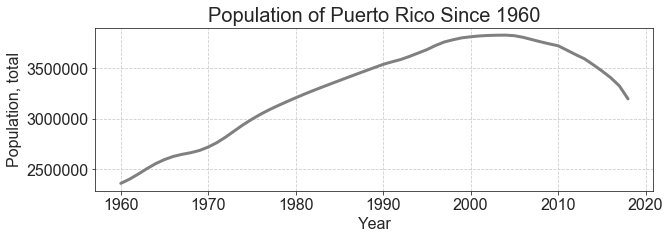

In [34]:
puertorico_data = interpolated_data_set_flattened.loc[interpolated_data_set_flattened["Country"] == "Puerto Rico"]
sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '--'})
plt.rcParams.update({'axes.titlesize' : 18, 'lines.linewidth' : 3,\
    'axes.labelsize' : 16, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16})
f, ax = plt.subplots(figsize=(10, 3))
plt.title("Population of Puerto Rico Since 1960", fontdict = {"fontsize" : 20})
sns.lineplot(x="Year", y="Population, total",\
     color="gray", data=puertorico_data, ax=ax)


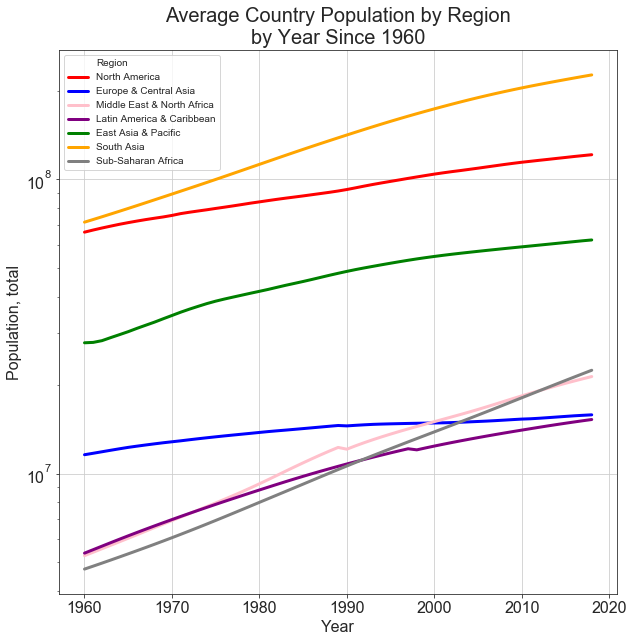

In [35]:
region_line_plot(mean_by_region_and_year, "Population, total", "Average Country Population by Region\nby Year Since 1960", y_scale="log")


### Population Growth - Distribution In 2018
 Alternative visualisation using a violin plot to take a look at population growth distribution by region in 2018

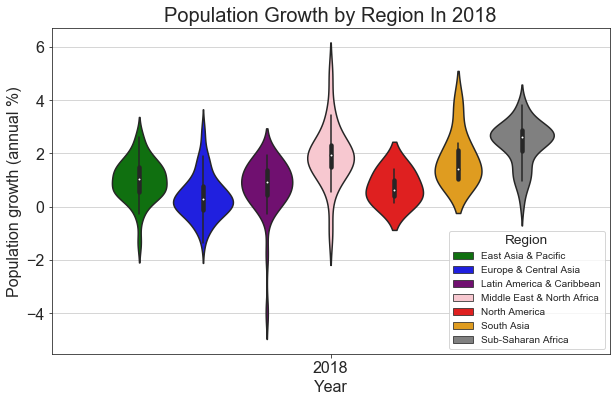

In [36]:
sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '-'})
plt.rcParams.update({'axes.titlesize' : 18, 'lines.linewidth' : 1.5,\
    'axes.labelsize' : 16, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16})
f, ax = plt.subplots(figsize=(10, 6))
plt.title("Population Growth by Region In 2018", fontdict = {"fontsize" : 20})
sns.violinplot(x="Year", y="Population growth (annual %)", hue="Region",\
    palette=region_palette, data=interpolated_data_set_flattened.loc[interpolated_data_set_flattened["Year"] == 2018])


